In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
!pip install version_information

  Running setup.py bdist_wheel for version-information: started
  Running setup.py bdist_wheel for version-information: finished with status 'done'
  Stored in directory: C:\Users\Nitesh\AppData\Local\pip\Cache\wheels\4b\4c\f7\4d99d7820a507d8ae55204fcc00d66cdabf596d4b01228e7bd
Successfully built version-information


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!python -m pip install --upgrade pip

  Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [5]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, sklearn

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.14393
pandas 0.18.1
numpy 1.11.3
matplotlib 1.5.3
sklearn 0.18.1
Sat Feb 18 16:24:46 2017 Pacific Standard Time

In [121]:
#lets import train data
df=pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [124]:
#train["Survived"].groupby(train["Survived"]).count()
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

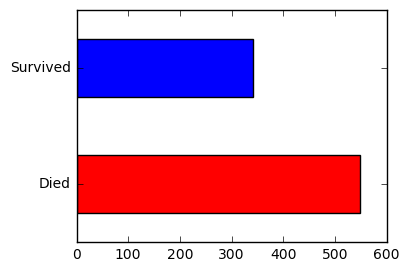

In [130]:
fig=plt.figure(figsize=(4,3))
ax=fig.add_subplot()
ax=df.Survived.value_counts().plot(kind='barh',color=['red','blue'])
ax.set_yticklabels(["Died","Survived"])

plt.show()

In [142]:
male_surv=df.Survived[df.Survived==1][df.Sex=='male'].value_counts()
males=df.Survived[df.Sex=='male'].value_counts()
print(male_surv)

female_surv=df.Survived[df.Survived==1][df.Sex=='female'].value_counts()
females=df.Survived[df.Sex=='female'].value_counts()
print(female_surv)

1    109
Name: Survived, dtype: int64
1    233
Name: Survived, dtype: int64


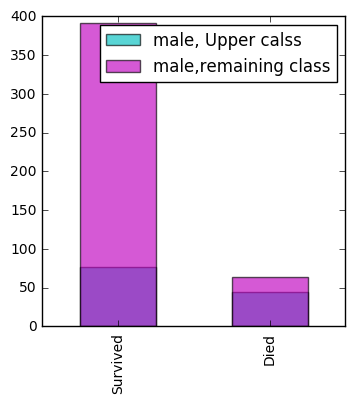

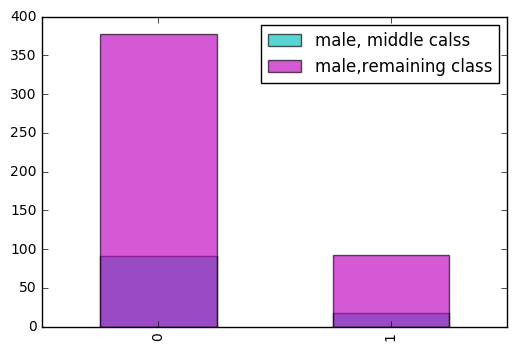

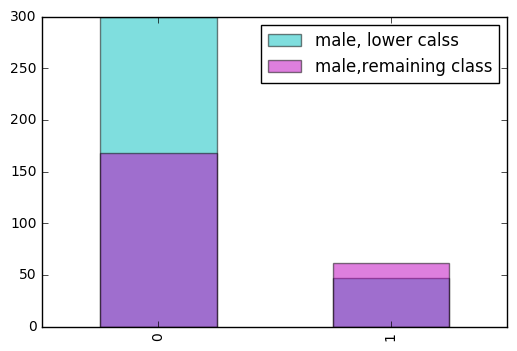

In [136]:
#let's explore Survived/Died based on features like Pclass,Sex, Age,Fare
fig=plt.figure(figsize=(18,4),dpi=1600)
ax1=fig.add_subplot(141)

df.Survived[df.Sex=='male'][df.Pclass==1].value_counts().plot(kind='bar',color='c',alpha=0.65,label='male, Upper calss')
df.Survived[df.Sex=='male'][df.Pclass!=1].value_counts().plot(kind='bar',color='m',alpha=0.65,label='male,remaining class')
ax1.set_xticklabels(['Survived','Died'])
#ax1.set_xlim(0,len(train.Survived))
plt.legend(loc='best')
plt.show()

ax2=fig.add_subplot(142)

df.Survived[df.Sex=='male'][df.Pclass==2].value_counts().plot(kind='bar',color='c',alpha=0.65,label='male, middle calss')
df.Survived[df.Sex=='male'][df.Pclass!=2].value_counts().plot(kind='bar',color='m',alpha=0.65,label='male,remaining class')
ax2.set_xticklabels(['Survived','Died'])
plt.legend(loc='best')
plt.show()

ax2=fig.add_subplot(143)

df.Survived[df.Sex=='male'][df.Pclass==3].value_counts().plot(kind='bar',color='c',alpha=0.5,label='male, lower calss')
df.Survived[df.Sex=='male'][df.Pclass!=3].value_counts().plot(kind='bar',color='m',alpha=0.5,label='male,remaining class')
ax2.set_xticklabels(['Survived','Died'])
plt.legend(loc='best')
plt.show()

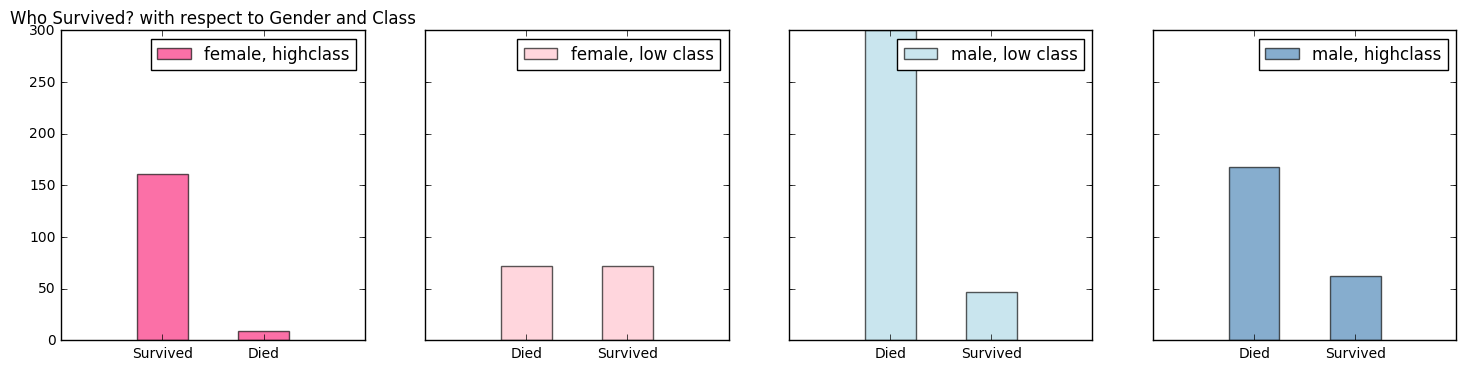

In [137]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')